In [7]:
#项目7-项目实施代码
from sklearn.datasets import fetch_lfw_people #导入名人人脸照片数据集
import matplotlib.pyplot as plt

faces=fetch_lfw_people(data_home='./item7',min_faces_per_person=60) #选取最少有60张照片的数据作为训练集
#如果为 False，则在数据在本地不可用时，引发 IOError错误， 而不是尝试从源站点下载数据
x,y = faces.data,faces.target # x:1348*2914  y:1348
#print(x[0],len(x[0]))
#print(y,len(y))
# print(type(faces))
# print(faces)
target_names = faces.target_names  #获取名人的姓名
n_samples,h,w = faces.images.shape  #n_samples 为样本数量, h 和 w为特征变量
#lfw_home/pairsDevTrain.txt
#输出数据集信息
print(target_names,len(target_names))#显示名人的姓名
print(n_samples,h,w)#显示样本数量与照片尺寸
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair'] 8
1348 62 47
(1348, 62, 47)


1348
150 62 47


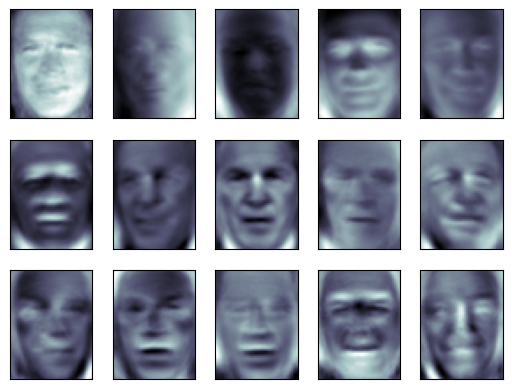

In [3]:
#数据降维处理
from sklearn.decomposition import PCA #导入PCA降维算法

#降维处理，维度降低到150个
n_components=150
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True,random_state=70).fit(x)

eigenfaces=pca.components_.reshape((n_components,h,w))    #提取特征值

x_pca=pca.transform(x)  #将训练集转化成低维度的特征向量
print(len(x_pca))
print(len(eigenfaces),len(eigenfaces[0]),len(eigenfaces[0][1]))

#以3行5列的形式显示降维后的照片
fig,ax=plt.subplots(3,5) 
for i,axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i].reshape(h,w),cmap='bone')
    axi.set(xticks=[],yticks=[])
plt.show()

In [4]:
from sklearn.svm import SVC     #导入支持向量机分类模块
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=400,random_state=42) # x_pca 1348种名人

#使用网格搜索法寻找参数的最优值
param_grid = {'C':[1, 5, 10, 50, 100], 'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
grid=GridSearchCV(SVC(kernel="rbf",random_state=0),param_grid=param_grid,cv=5) # 交叉验证cv次
grid.fit(x_train,y_train)
print("最优参数值为：%s"%grid.best_params_)

#最优模型评估
model=grid.best_estimator_  #获取最优模型
pred=model.predict(x_test)
re=classification_report(y_test,pred,target_names=faces.target_names)
print("最优模型的评估报告：")
print(re)

最优参数值为：{'C': 5, 'gamma': 0.005}
最优模型的评估报告：
                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.65      0.73        17
     Colin Powell       0.79      0.83      0.81        84
  Donald Rumsfeld       0.90      0.74      0.81        35
    George W Bush       0.76      0.95      0.85       145
Gerhard Schroeder       0.91      0.71      0.80        28
      Hugo Chavez       1.00      0.62      0.76        26
Junichiro Koizumi       1.00      0.69      0.81        16
       Tony Blair       0.90      0.71      0.80        49

         accuracy                           0.82       400
        macro avg       0.89      0.74      0.80       400
     weighted avg       0.83      0.82      0.81       400



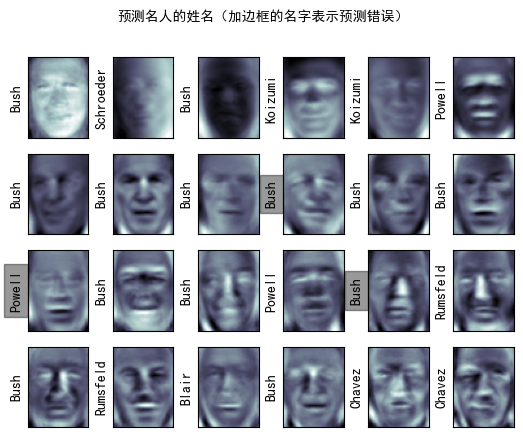

In [5]:
#画图，显示分类结果
fig,ax=plt.subplots(4,6) #创建一个4行6列的画布
for i,axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i].reshape(h,w),cmap='bone')#绘制图像
    axi.set(xticks=[],yticks=[])
    box=dict(fc='black',alpha=0.4) #设置边框样式 

    
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1],
                  bbox=None if pred[i]==y_test[i] else box) #显示预测姓名，预测正确显示为黑色文字，预测错误显示为黑色加边框文字
plt.rcParams['font.sans-serif']='Simhei'
plt.suptitle('预测名人的姓名（加边框的名字表示预测错误）',size=10)
plt.show()